# Deep Nural Network with Keras

## Import Necessary Modules

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import initializers

## Import Data

In [2]:
data=pd.read_csv("../data/labelled-data/data_all")
display(data)

,strain11,strain22,strain12,stress11,stress22,stress12,defect_mode
0,-5.000000e-05,-0.00005,0.000000,-0.013583,-0.022138,0.000618,1
1,-1.000000e-04,-0.00010,0.000000,-0.040113,-0.008942,-0.005942,1
2,-1.500000e-04,-0.00015,0.000000,-0.033780,-0.031261,-0.008021,1
3,-2.000000e-04,-0.00020,0.000000,-0.037354,-0.059623,0.004804,1
4,-2.500000e-04,-0.00025,0.000000,-0.053246,-0.049469,-0.007299,1
...,...,...,...,...,...,...,...
165995,8.740412e-16,-0.19980,0.199078,-23.844975,-27.547010,5.018410,0
165996,8.740412e-16,-0.19985,0.199127,-23.875656,-27.557866,5.007577,0
165997,8.740412e-16,-0.19990,0.199177,-23.841551,-27.610255,5.000587,0
165998,8.740412e-16,-0.19995,0.199227,-23.832272,-27.613363,5.049358,0


In [6]:
data.isnull().any()

strain11       False
strain22       False
strain12       False
stress11       False
stress22       False
stress12       False
defect_mode    False
dtype: bool

In [7]:
display(data)

,strain11,strain22,strain12,stress11,stress22,stress12,defect_mode
0,-5.000000e-05,-0.00005,0.000000,-0.013583,-0.022138,0.000618,1
1,-1.000000e-04,-0.00010,0.000000,-0.040113,-0.008942,-0.005942,1
2,-1.500000e-04,-0.00015,0.000000,-0.033780,-0.031261,-0.008021,1
3,-2.000000e-04,-0.00020,0.000000,-0.037354,-0.059623,0.004804,1
4,-2.500000e-04,-0.00025,0.000000,-0.053246,-0.049469,-0.007299,1
...,...,...,...,...,...,...,...
165995,8.740412e-16,-0.19980,0.199078,-23.844975,-27.547010,5.018410,0
165996,8.740412e-16,-0.19985,0.199127,-23.875656,-27.557866,5.007577,0
165997,8.740412e-16,-0.19990,0.199177,-23.841551,-27.610255,5.000587,0
165998,8.740412e-16,-0.19995,0.199227,-23.832272,-27.613363,5.049358,0


In [7]:
data[data["defect_mode"]==-0.0].count()

strain11       55668
strain22       55668
strain12       55668
stress11       55668
stress22       55668
stress12       55668
defect_mode    55668
dtype: int64

# Defect Mode Clasification

## Preprocessing

### Input Features and class seperation

In [3]:
X= data.iloc[:,0:3] # input feature
y_class=data.iloc[:,-1] # Classes

### One vs all encoding of Classes

In [4]:
# One-Hot Enconding
enc= OneHotEncoder(categories="auto")
y = enc.fit_transform(y_class.to_numpy().reshape(len(y_class),1)).toarray()

### Training Test Split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

### Feature Scaling

In [6]:
# Feature Scaling
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.fit_transform(X_test)

In [12]:
display(X_test_norm)

array([[-1.18722802, -1.23497178,  1.26972548],
       [ 0.81746516,  0.80555056, -0.91262578],
       [ 0.63803367,  0.62291215, -0.78685327],
       ...,
       [-1.33333227, -1.38368731,  1.52575494],
       [-0.44807738, -0.48261057, -0.13483854],
       [-0.44807738, -0.48261057, -0.68423291]])

In [13]:
display(X_train_norm)

array([[ 0.81450464,  0.8110155 , -0.90629917],
       [ 0.529653  , -1.46455018,  1.68308563],
       [-0.45229639, -0.47089152, -0.07212938],
       ...,
       [-0.45229639,  0.71372792, -0.02491222],
       [-0.45229639,  2.20014971,  1.81158671],
       [-1.03539395,  0.1191592 ,  0.98932476]])

## Define Keras Model

In [7]:
# DEFINITION OF THE MODEL

# The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
kernel_init = initializers.RandomNormal(seed=14)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_norm.shape[1],), kernel_initializer=kernel_init))
model.add(Dense(8, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(3, activation=tf.nn.softmax))  # Output Layer

# DEFINITION OF THE OPTIMIZER

optimizer = optimizers.RMSprop(0.002) # Root Mean Squared Propagation

# This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________


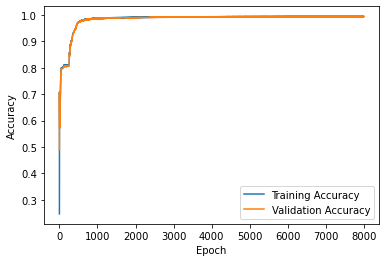

In [8]:
class PrintEpNum(tf.keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number


EPOCHS = 8000 # Number of EPOCHS

# HISTORY Object which contains how the model learned
history = model.fit(X_train_norm, y_train, batch_size=X_train_norm.shape[0], \
                    epochs=EPOCHS, validation_split=0.1, verbose = False, callbacks=[PrintEpNum()],workers=48)

# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.epoch, np.array(history.history['accuracy']),label='Training Accuracy')
plt.plot(history.epoch, np.array(history.history['val_accuracy']),label = 'Validation Accuracy')
plt.legend()
plt.show()

In [9]:
loss, acc = model.evaluate(X_train_norm, y_train, verbose=0)

print("Training Set Accuracy: %f" %(acc))

loss, acc = model.evaluate(X_test_norm, y_test, verbose=0)

print("Testing Set Accuracy: %f" %(acc))

Training Set Accuracy: 0.993099
Testing Set Accuracy: 0.990904


#### Save The Trained Model

In [ ]:
path=os.getcwd()

In [20]:
model.save(os.path.expanduser(path+'classifier_model.h5'))

#### Load The previous model

In [ ]:
model=tf.keras.load_model(os.path.expanduser(path+'classifier_model.h5'))

<AxesSubplot:>

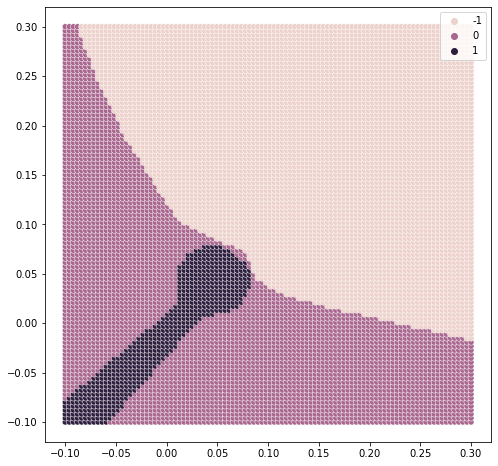

In [25]:
fig=plt.figure(figsize=(8,8))
test_norm=np.linspace(-0.1,0.3,100)
test_shear=np.linspace(-0.2,0.2,100)
test_cord=[[i,j,0.0] for i in test_norm for j in test_norm]
test_cord=np.array(test_cord)
predictions=model.predict(scaler.fit_transform(test_cord))
predictions=np.argmax(predictions,axis=1)
predictions[predictions==0]=-1
predictions[predictions==1]=0
predictions[predictions==2]=1
sns.scatterplot(x=test_cord[:,0],y=test_cord[:,1],hue=predictions)#.figure.savefig("./output_0_shear.png")

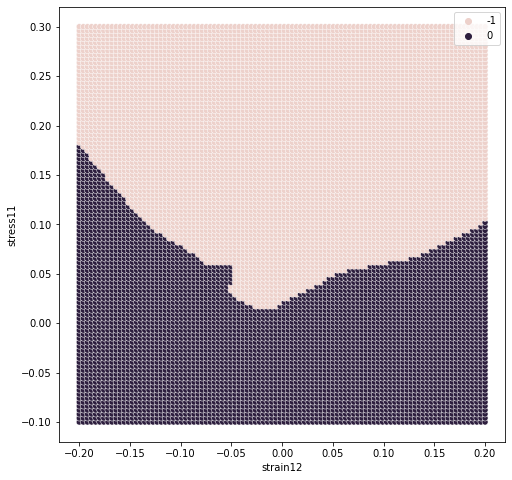

In [32]:
fig=plt.figure(figsize=(8,8))
test_norm=np.linspace(-0.1,0.3,100)
test_shear=np.linspace(-0.2,0.2,100)
test_cord=[[i,0,j] for i in test_norm for j in test_shear]
test_cord=np.array(test_cord)
predictions=model.predict(scaler.fit_transform(test_cord))
predictions=np.argmax(predictions,axis=1)
predictions[predictions==0]=-1
predictions[predictions==1]=0
predictions[predictions==2]=1
sns.scatterplot(x=test_cord[:,2],y=test_cord[:,0],hue=predictions)#.figure.savefig("./output_0_shear.png")
plt.xlabel("strain12")
plt.ylabel("stress11");

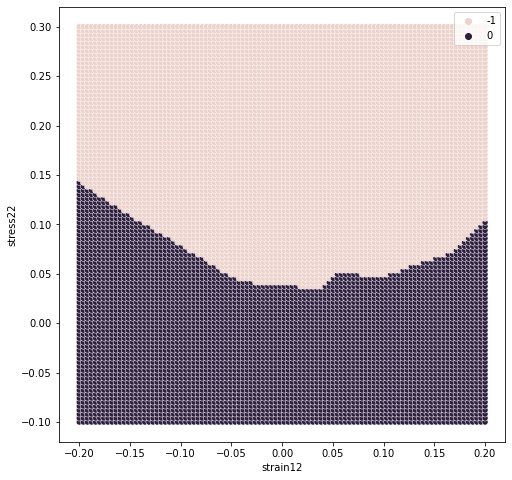

In [33]:
fig=plt.figure(figsize=(8,8))
test_norm=np.linspace(-0.1,0.3,100)
test_shear=np.linspace(-0.2,0.2,100)
test_cord=[[0,i,j] for i in test_norm for j in test_shear]
test_cord=np.array(test_cord)
predictions=model.predict(scaler.fit_transform(test_cord))
predictions=np.argmax(predictions,axis=1)
predictions[predictions==0]=-1
predictions[predictions==1]=0
predictions[predictions==2]=1
sns.scatterplot(x=test_cord[:,2],y=test_cord[:,1],hue=predictions)#.figure.savefig("./output_0_shear.png")
plt.xlabel("strain12")
plt.ylabel("stress22");

# Stress Regression

## Defect Free Stress Regression

### Select only the Defect Free data points( "defect_mode"=1)

In [17]:
defect_free=data[data["defect_mode"]==1]

### Seperate the Inputes(strain states) and Outputs(stress states)

In [18]:
# Input Features and stress Regresson
X_sr1= defect_free.iloc[:,0:3] # input feature/strain-state
y_sr1=defect_free.iloc[:,3:6] # output feature/stress-state

### Training Test Split

In [19]:
X_sr1_train,X_sr1_test,y_sr1_train,y_sr1_test=train_test_split(X_sr1,y_sr1,test_size=0.1,random_state=42)

### Feature Scaling

In [20]:
scaler=StandardScaler()
X_sr1_train_norm=scaler.fit_transform(X_sr1_train)
X_sr1_test_norm=scaler.fit_transform(X_sr1_test)

### Defining the Keral Model

In [21]:
# DEFINITION OF THE MODEL

# The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()
# In a sequential model, the first layer must specify the input shape the model will expect; 
# in this case the value is train_values.shape[1] which is the number
# of attributes (properties) and equals 17.

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_sr1_train.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(16, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(8, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(3, kernel_initializer=kernel_init, bias_initializer=bias_init))

# DEFINITION OF THE OPTIMIZER

optimizer = optimizers.RMSprop(0.002) # Root Mean Squared Propagation

# This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
Total params: 819
Trainable params: 819
Non-trainable params: 0
_________________________________________________________________


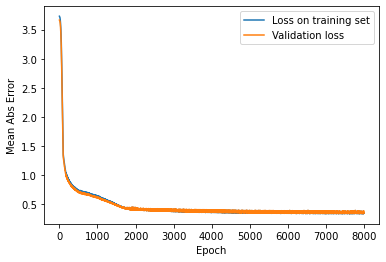

In [22]:
# EPOCH REAL TIME COUNTER CLASS
class PrintEpNum(tf.keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 8000 # Number of EPOCHS

# HISTORY Object which contains how the model learned

# Training Values (Properties), Training Labels (Known Young's Moduli) 
history = model.fit(X_sr1_train_norm, y_sr1_train, batch_size=X_sr1_train_norm.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()],
                    workers=48)


# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mae']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_mae']),label = 'Validation loss')
plt.legend()
plt.show()

In [24]:
[loss, mae] = model.evaluate(X_sr1_test_norm, y_sr1_test, verbose=0)

print("Testing Set Mean Absolute Error: {:2.2f} GPa".format(mae))

Testing Set Mean Absolute Error: 0.38 GPa


#### Save the trained model

In [ ]:
path=os.getcwd()

In [ ]:
model.save(os.path.expanduser(path+'stabe_sr.h5'))

#### Load previously saved model

In [ ]:
model=tf.keras.model.load_model(path+'stable_sr.h5')